In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import seaborn as sns

In [2]:
def testGaussianNB(dataset_df: pd.DataFrame, train_labels: list, result_label: str):
    dataset_df = dataset_df.sample(frac=1, random_state=1).reset_index().drop(columns=['index'])
    dataset_len = len(dataset_df)
    result_df = pd.DataFrame({'ntrain': [i for i in range(1, dataset_len)],
                          'ntest': [i for i in range(dataset_len - 1, 0, -1)],
                        })
    result_df['ntrain ratio'] = result_df['ntrain'] / dataset_len
    train_accuracy = []
    test_accuracy = []
    accuracy = []
    for _, row in result_df.iterrows():
        gnb = GaussianNB()
        gnb.fit(X=dataset_df.loc[:row['ntrain'] - 1, train_labels], y=dataset_df.loc[:row['ntrain'] - 1, result_label])
        
        train_pred = gnb.predict(dataset_df.loc[:row['ntrain'] - 1, train_labels])
        test_pred = gnb.predict(dataset_df.loc[:row['ntest'] - 1, train_labels])
        pred = gnb.predict(dataset_df.loc[:, train_labels])

        train_accuracy.append((dataset_df.loc[:row['ntrain'] - 1, result_label] == train_pred).sum() / row['ntrain'])
        test_accuracy.append((dataset_df.loc[:row['ntest'] - 1, result_label] == test_pred).sum() / row['ntest'])
        accuracy.append((dataset_df.loc[:, result_label] == pred).sum() / dataset_len)
    result_df['train_accuracy'] = train_accuracy
    result_df['test_accuracy'] = test_accuracy
    result_df['accuracy'] = accuracy
    display(result_df)
    display(result_df.loc[:,['train_accuracy', 'test_accuracy', 'accuracy']].describe())
    result_df.plot(x='ntrain ratio', y=['train_accuracy', 'test_accuracy', 'accuracy'], figsize=(20,10), ylabel='accuracy', grid=True, xticks=np.arange(0, 1.1, 0.1), yticks=np.arange(0, 1.1, 0.1))
    

ntrain  ntest  ntrain ratio  train_accuracy  test_accuracy  accuracy
0         1    956      0.001045        1.000000       0.652720  0.653083
1         2    955      0.002090        1.000000       0.652356  0.653083
2         3    954      0.003135        1.000000       0.653040  0.653083
3         4    953      0.004180        1.000000       0.653725  0.653083
4         5    952      0.005225        1.000000       0.654412  0.653083
..      ...    ...           ...             ...            ...       ...
951     952      5      0.994775        0.716387       1.000000  0.714734
952     953      4      0.995820        0.715635       1.000000  0.714734
953     954      3      0.996865        0.714885       1.000000  0.714734
954     955      2      0.997910        0.714136       1.000000  0.714734
955     956      1      0.998955        0.714435       1.000000  0.714734

[956 rows x 6 columns]

train_accuracy  test_accuracy    accuracy
count      956.000000     956.000000  956.000000
mean         0.749313       0.724519    0.701318
std          0.042004       0.040491    0.024018
min          0.709677       0.529661    0.526646
25%          0.723257       0.715911    0.702194
50%          0.735104       0.729448    0.709509
75%          0.761905       0.740440    0.714734
max          1.000000       1.000000    0.719958

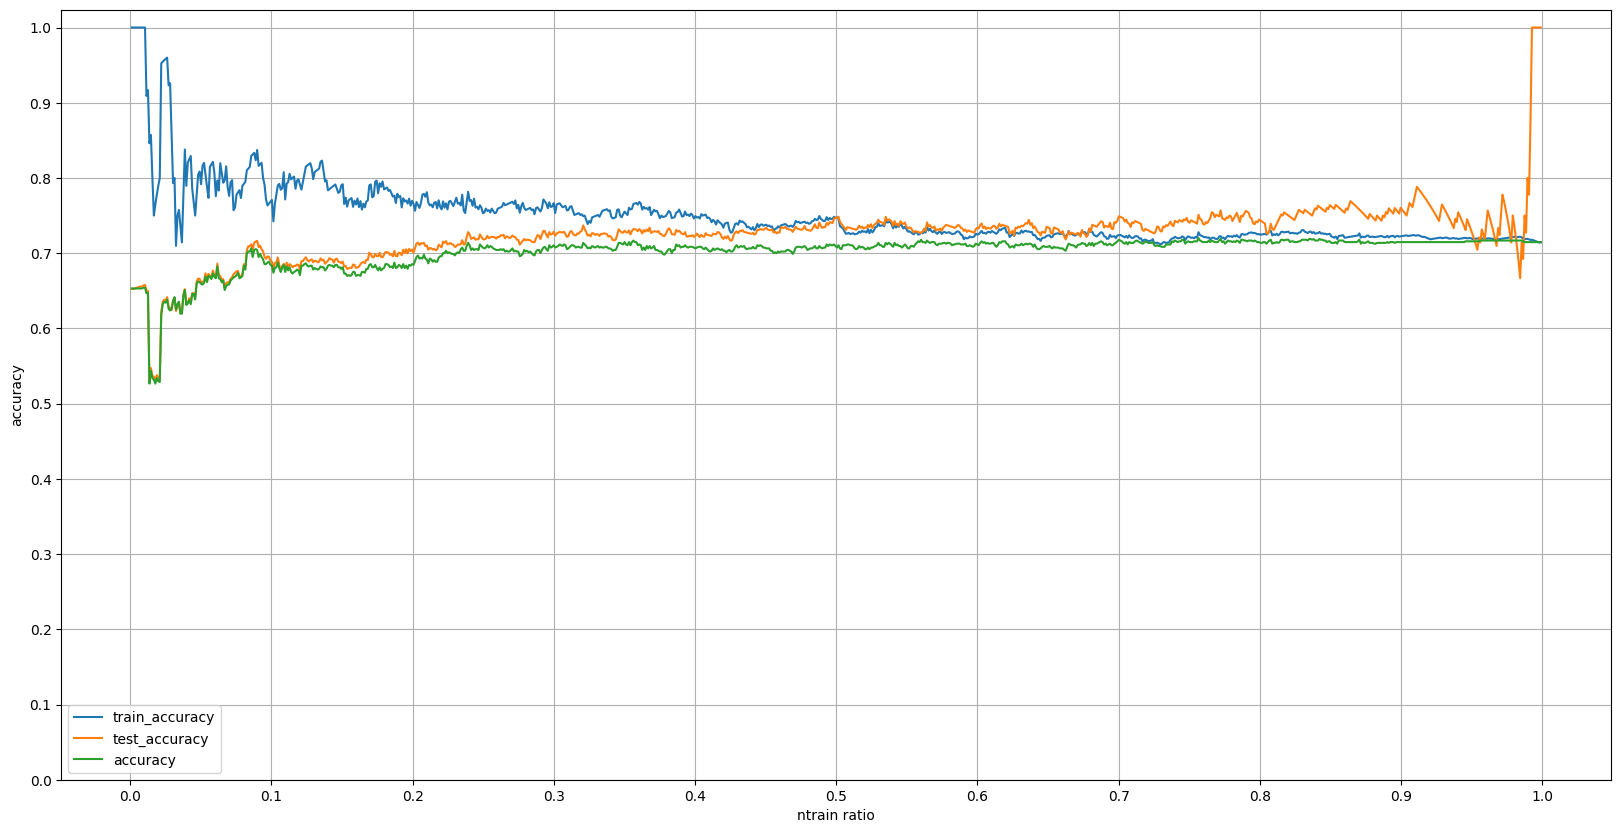

In [3]:
tic_tac_toe_df = pd.read_csv('data/tic_tac_toe.txt')\
    .rename(columns={'x': 'v1',
                     'x.1': 'v2',
                     'x.2': 'v3',
                     'x.3': 'v4',
                     'o': 'v5',
                     'o.1': 'v6',
                     'x.4': 'v7',
                     'o.2': 'v8',
                     'o.3': 'v9',
                     'positive': 'result'})\
    .replace({'x': 1, 'o': 2, 'b': 3})
tic_tac_toe_df = tic_tac_toe_df.sample(frac=1, random_state=42).reset_index().drop(columns=['index'])

testGaussianNB(tic_tac_toe_df, ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9'], 'result')

ntrain  ntest  ntrain ratio  train_accuracy  test_accuracy  accuracy
0          1   4600      0.000217        1.000000       0.393913  0.394045
1          2   4599      0.000435        1.000000       0.393999  0.394045
2          3   4598      0.000652        1.000000       0.393867  0.394045
3          4   4597      0.000869        1.000000       0.394170  0.394262
4          5   4596      0.001087        1.000000       0.596388  0.596392
...      ...    ...           ...             ...            ...       ...
4595    4596      5      0.998913        0.822672       0.400000  0.822865
4596    4597      4      0.999131        0.822710       0.500000  0.822865
4597    4598      3      0.999348        0.822314       0.333333  0.822430
4598    4599      2      0.999565        0.822788       0.000000  0.822865
4599    4600      1      0.999783        0.822826       0.000000  0.822865

[4600 rows x 6 columns]

train_accuracy  test_accuracy     accuracy
count     4600.000000    4600.000000  4600.000000
mean         0.825253       0.815149     0.821141
std          0.016731       0.032492     0.016431
min          0.790000       0.000000     0.394045
25%          0.821320       0.816773     0.821561
50%          0.823500       0.820198     0.823517
75%          0.826053       0.822989     0.825038
max          1.000000       0.831108     0.827646

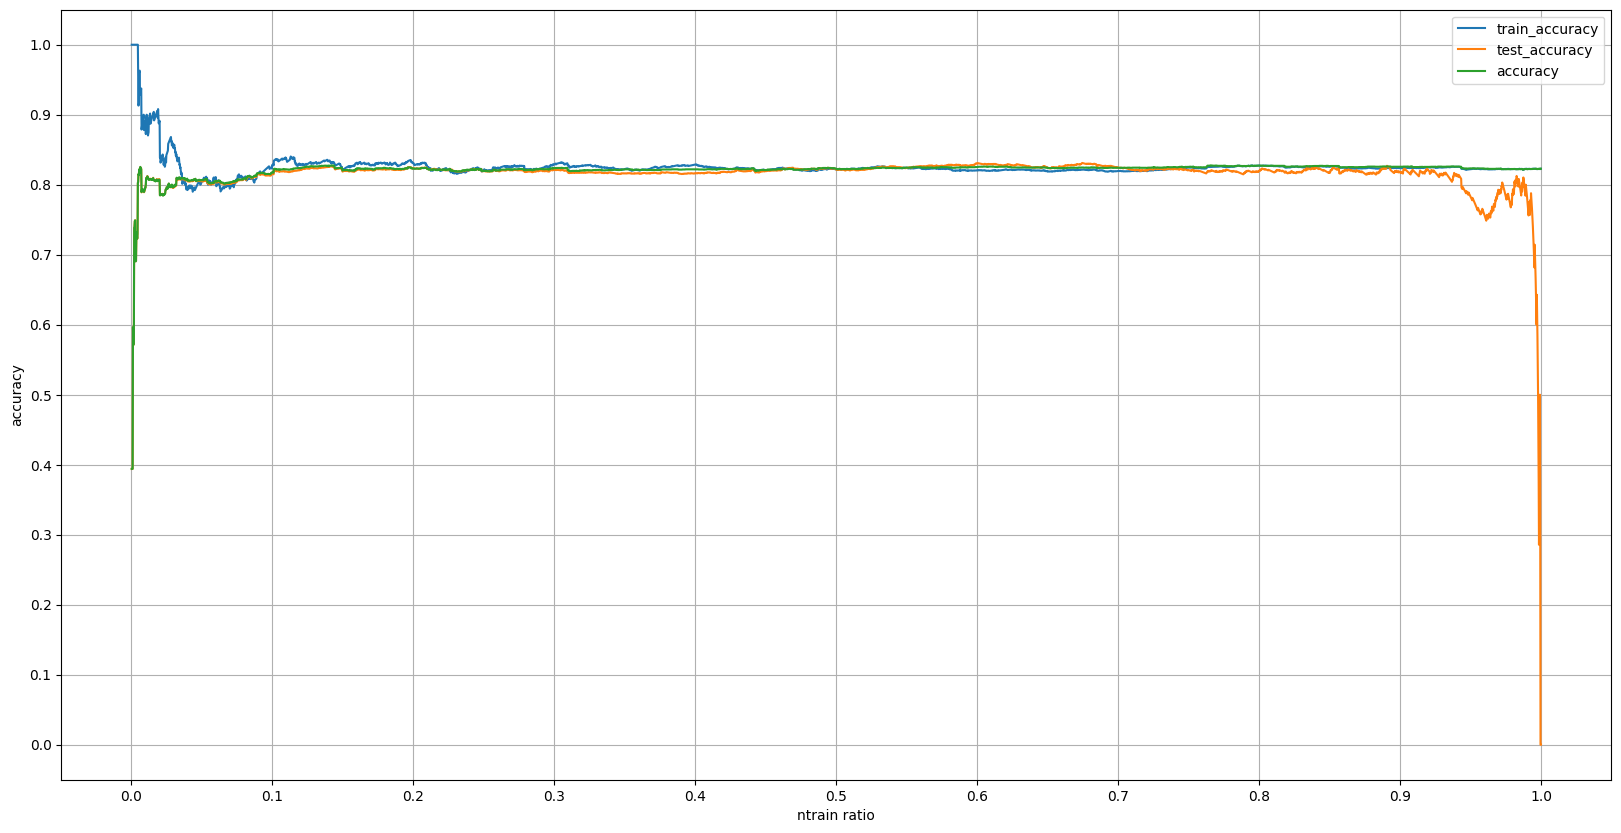

In [4]:
spam_df = pd.read_csv('data/spam.csv').drop(columns=['Unnamed: 0'])
train_labels = list(spam_df.columns)
train_labels.remove('type')
test_label = 'type'

testGaussianNB(spam_df, train_labels=train_labels, result_label=test_label)

X1         X2  class
0   29.497381   7.223545     -1
1   20.552974  10.982137     -1
2   20.887313  13.640148     -1
3   18.708126  16.504676     -1
4   26.461631  14.262540     -1
..        ...        ...    ...
95  11.825297   4.372562      1
96  12.986335   6.602319      1
97  12.213534   6.420282      1
98  14.190700   6.810952      1
99  10.103639   7.044442      1

[100 rows x 3 columns]

<Axes: xlabel='X1', ylabel='X2'>

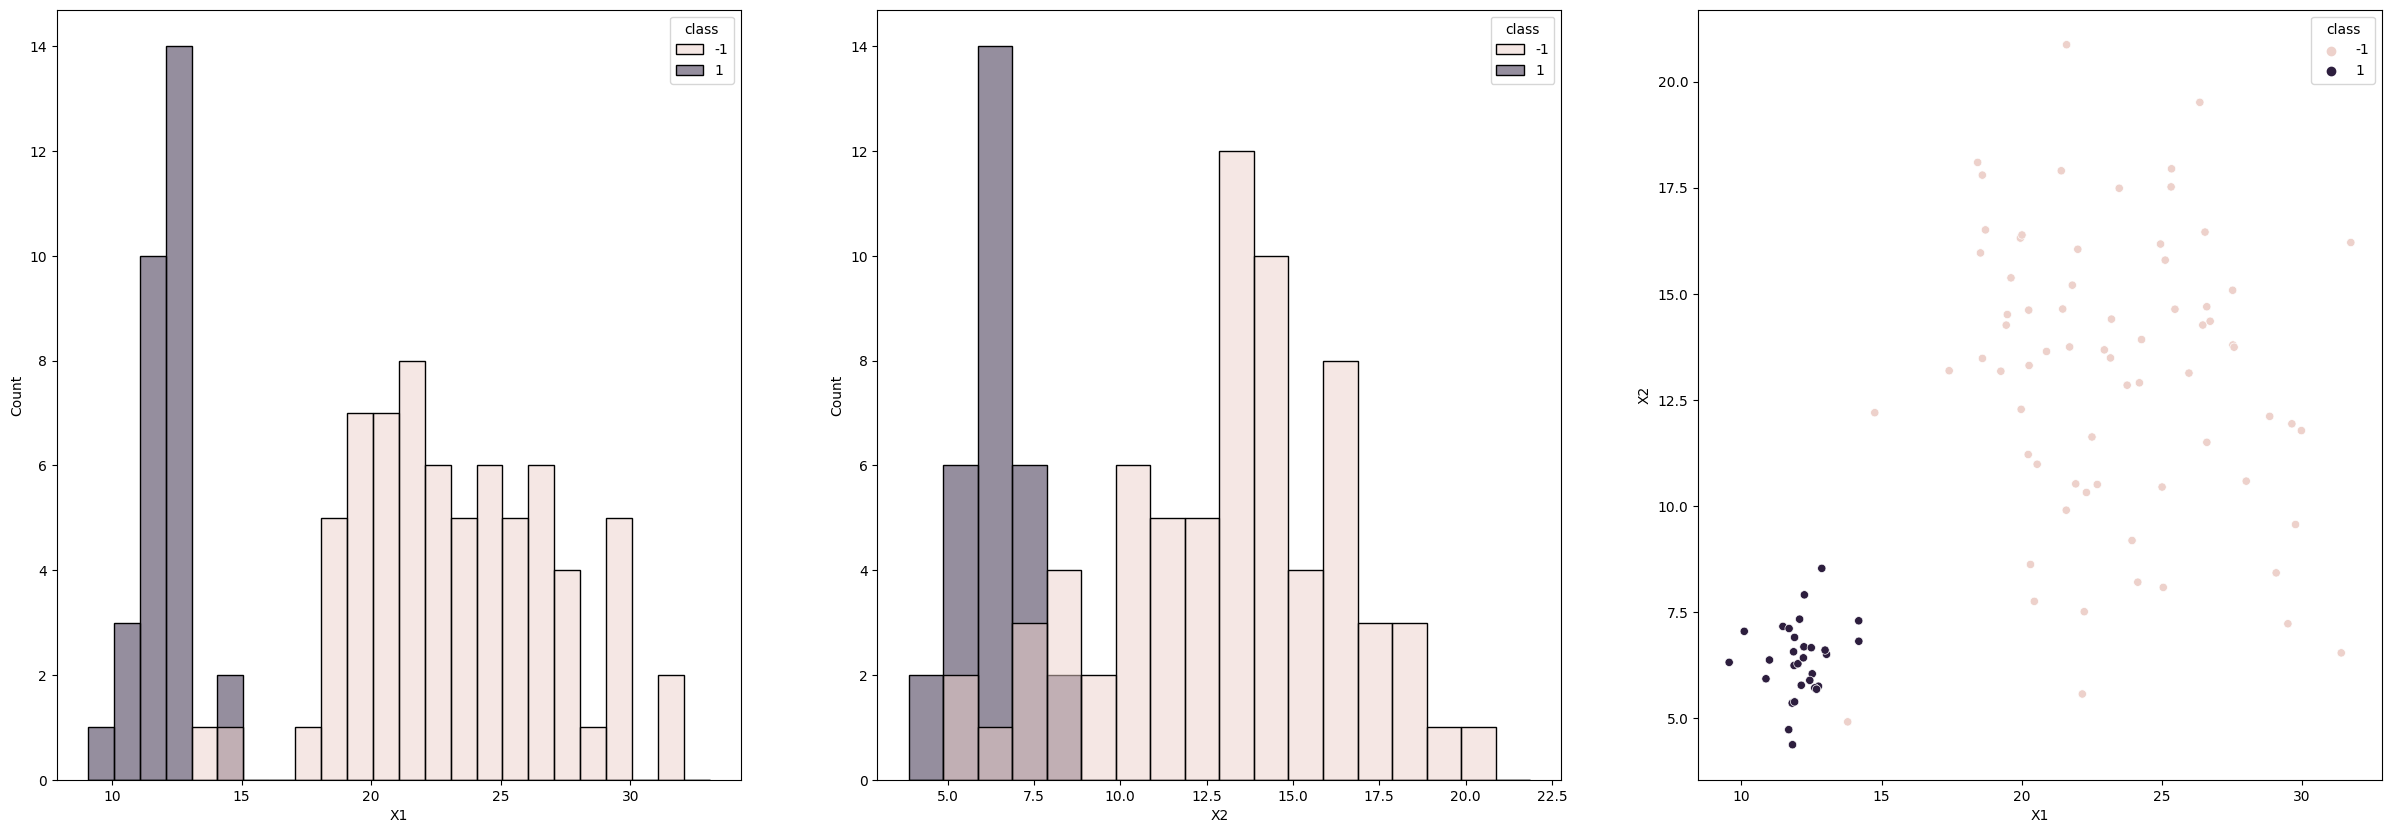

In [5]:
np.random.seed(1)
MX1_1, MX2_1, STD_1, N1 = 23, 13, 4, 70
MX1_2, MX2_2, STD_2, N2 = 12, 6, 1, 30
dataset_df_class_1 = pd.DataFrame({
    'X1': np.random.normal(MX1_1, STD_1, N1),
    'X2': np.random.normal(MX2_1, STD_1, N1),
    'class': -1
})
dataset_df_class_2 = pd.DataFrame({
    'X1': np.random.normal(MX1_2, STD_2, N2),
    'X2': np.random.normal(MX2_2, STD_2, N2),
    'class': 1
})
dataset_df = pd.concat([dataset_df_class_1, dataset_df_class_2], ignore_index=True)
display(dataset_df)
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
sns.histplot(data=dataset_df, x='X1', hue='class', ax=axes[0], discrete=True)
sns.histplot(data=dataset_df, x='X2', hue='class', ax=axes[1], discrete=True)
sns.scatterplot(data=dataset_df, x='X1', y='X2', hue='class', ax=axes[2])

In [6]:
testGaussianNB(dataset_df, train_labels=['X1', 'X2'], result_label='class')

ntrain  ntest  ntrain ratio  train_accuracy  test_accuracy  accuracy
0        1     99          0.01        1.000000       0.303030      0.30
1        2     98          0.02        1.000000       0.306122      0.30
2        3     97          0.03        1.000000       0.309278      0.31
3        4     96          0.04        1.000000       0.312500      0.31
4        5     95          0.05        1.000000       0.305263      0.31
..     ...    ...           ...             ...            ...       ...
94      95      5          0.95        0.989474       1.000000      0.99
95      96      4          0.96        0.989583       1.000000      0.99
96      97      3          0.97        0.989691       1.000000      0.99
97      98      2          0.98        0.989796       1.000000      0.99
98      99      1          0.99        0.989899       1.000000      0.99

[99 rows x 6 columns]

train_accuracy  test_accuracy   accuracy
count       99.000000      99.000000  99.000000
mean         0.999479       0.954623   0.945253
std          0.002270       0.164143   0.162062
min          0.989474       0.303030   0.300000
25%          1.000000       1.000000   0.990000
50%          1.000000       1.000000   0.990000
75%          1.000000       1.000000   0.990000
max          1.000000       1.000000   0.990000

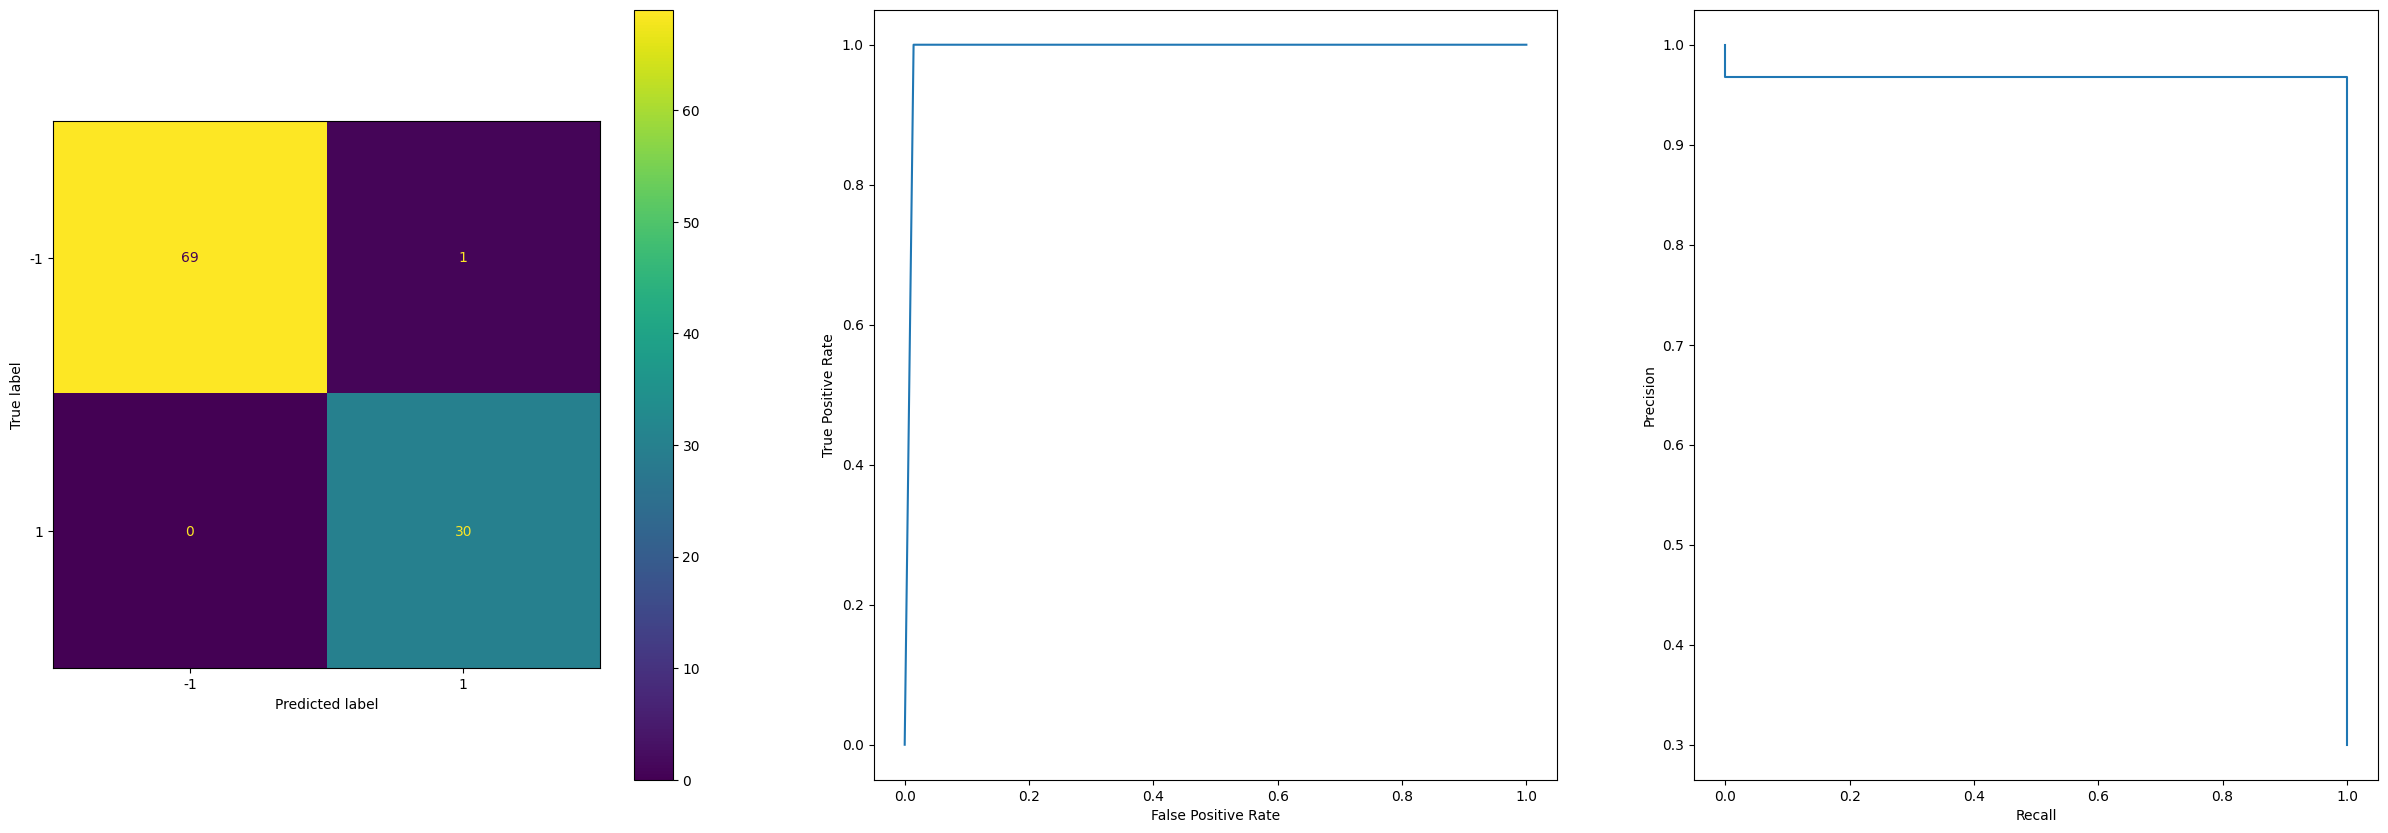

In [7]:
gnb = GaussianNB()
np.random.seed(1)
dataset_df = dataset_df.sample(frac=1, random_state=1).reset_index().drop(columns=['index'])
gnb.fit(X=dataset_df.loc[:50, ['X1', 'X2']], y=dataset_df.loc[:50, 'class'])

pred = gnb.predict(dataset_df.loc[:, ['X1', 'X2']])
cm = confusion_matrix(dataset_df.loc[:,'class'], pred)
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
ConfusionMatrixDisplay(cm, display_labels=gnb.classes_).plot(ax=axes[0])
fpr, tpr, _ = roc_curve(dataset_df.loc[:,'class'], pred)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=axes[1])
prec, recall, _ = precision_recall_curve(dataset_df.loc[:,'class'], pred)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=axes[2])
